# Sentiment Analysis Project
## Genshin Impact

In [1]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import praw

user_agent = "PracticeScraper 1.0 by /u/lmluk"
reddit = praw.Reddit(
    client_id="I7UtuKPLzIkEATK-e42-cg",
    client_secret="9K6fKvSbvO6o3fW0rNzxGpnHFnTeWw",
    user_agent=user_agent
)

## Flair: Discussion
for threads about gameplay & content

final_data = set()
header_list = ('id', 'title', 'author', 'url', 'num_upvotes', 'upvote_ratio', 'num_comments', 'date')

for submission in reddit.subreddit('Genshin_Impact').search('flair:Discussion'):
    val = (submission.id, submission.title, submission.author, submission.url, submission.score, submission.upvote_ratio, submission.num_comments, submission.created_utc)
    final_data.add(val)
print(len(final_data), type(final_data))

In [14]:
final_data = set()
for submission in reddit.subreddit('Genshin_Impact').search('flair:Discussion'):
    final_data.add(submission.title)
print(len(final_data), type(final_data))

100 <class 'set'>


In [15]:
df = pd.DataFrame(final_data)
df.head()

,0
0,What character you never plan to stop using?
1,Did you name your Wanderer/Scaramouche somethi...
2,Whats the most rage inducing challenge you hav...
3,Do you still use your first 5 star?
4,How do you cope with terrible luck on pulls?


In [16]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kirbypark/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in final_data:
    pol_score = sia.polarity_scores(line) #auto sentiment classification that returns dict
    pol_score['headline'] = line #store current line as a headline key in dict
    results.append(pol_score) #append to results
    
pprint(results[:3], width=100) #append first 3 results to see what it looks like

[{'compound': 0.2235,
  'headline': 'What character you never plan to stop using?',
  'neg': 0.0,
  'neu': 0.788,
  'pos': 0.212},
 {'compound': -0.7184,
  'headline': 'Did you name your Wanderer/Scaramouche something stupid and regretted it?',
  'neg': 0.429,
  'neu': 0.571,
  'pos': 0.0},
 {'compound': -0.5154,
  'headline': 'Whats the most rage inducing challenge you have encountered ?',
  'neg': 0.313,
  'neu': 0.562,
  'pos': 0.126}]


In [18]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.000,0.788,0.212,0.2235,What character you never plan to stop using?
1,0.429,0.571,0.000,-0.7184,Did you name your Wanderer/Scaramouche somethi...
2,0.313,0.562,0.126,-0.5154,Whats the most rage inducing challenge you hav...
3,0.000,1.000,0.000,0.0000,Do you still use your first 5 star?
4,0.237,0.534,0.229,-0.0258,How do you cope with terrible luck on pulls?


In [19]:
df['label'] = 0 
df.loc[df['compound'] > 0.2, 'label' ] = 1 #positive
df.loc[df['compound'] < -0.2, 'label'] = -1 #negative
df.head()

,neg,neu,pos,compound,headline,label
0,0.000,0.788,0.212,0.2235,What character you never plan to stop using?,1
1,0.429,0.571,0.000,-0.7184,Did you name your Wanderer/Scaramouche somethi...,-1
2,0.313,0.562,0.126,-0.5154,Whats the most rage inducing challenge you hav...,-1
3,0.000,1.000,0.000,0.0000,Do you still use your first 5 star?,0
4,0.237,0.534,0.229,-0.0258,How do you cope with terrible luck on pulls?,0


In [20]:
df2 = df[['headline', 'label']]

In [21]:
df2.to_csv(r'/Users/kirbypark/Desktop/JupyterNotebook/genshin_discussion_headlines.csv', index=False)

In [22]:
df2.label.value_counts()

 0    42
 1    35
-1    23
Name: label, dtype: int64

## Flair: Official Posts
for threads by publisher - updates, character birthdays, official art, etc.

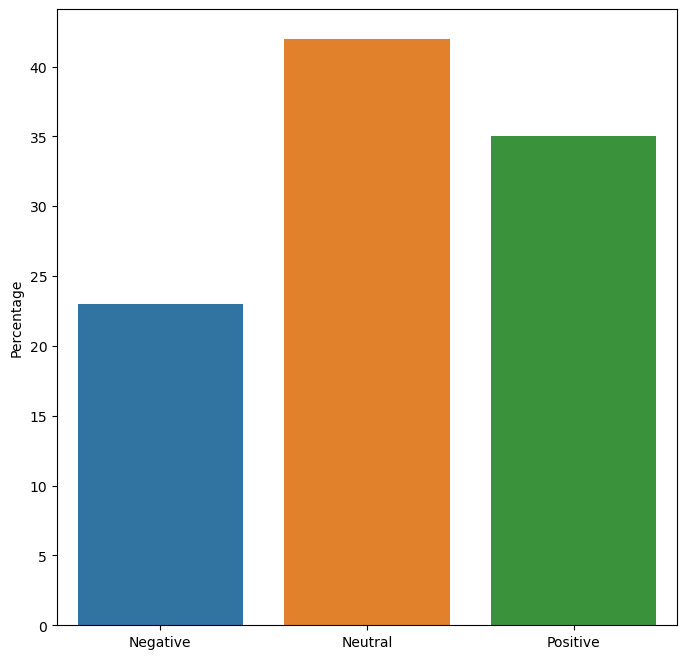

In [23]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df2.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel('Percentage')

plt.show()

## Individual Posts
sentiment analysis for comments within threads of interest

Ref: https://praw.readthedocs.io/en/latest/code_overview/models/comment.html

In [24]:
from praw.models import MoreComments

In [25]:
#function to get main comments from url

def get_comments(url):
    submission = reddit.submission(url=url)
    
    final_comments = []
    submission.comments.replace_more(limit=0)
    
    for comment in submission.comments:
        val = [comment.subreddit, comment.submission, comment.id, comment.score, comment.body, comment.author, comment.permalink]
        final_comments.append(val)
    
    return final_comments

In [26]:
get_comments("https://www.reddit.com/r/funny/comments/3g1jfi/buttons/")

[[Subreddit(display_name='funny'),
  Submission(id='3g1jfi'),
  'cttzfld',
  3434,
  '[deleted]',
  None,
  '/r/funny/comments/3g1jfi/buttons/cttzfld/'],
 [Subreddit(display_name='funny'),
  Submission(id='3g1jfi'),
  'ctu68p6',
  929,
  '[Trusted] Download\n\n[Fast] Download \n\nALWAYS NEITHER OF THESE ',
  Redditor(name='Osama_bin_Lefty'),
  '/r/funny/comments/3g1jfi/buttons/ctu68p6/'],
 [Subreddit(display_name='funny'),
  Submission(id='3g1jfi'),
  'ctu1drv',
  505,
  '"i must have chosen correct cause i got a congratulation saying i was the millionth person to download the file and to click here to claim my free ipad" ',
  Redditor(name='veilofmaya1234'),
  '/r/funny/comments/3g1jfi/buttons/ctu1drv/'],
 [Subreddit(display_name='funny'),
  Submission(id='3g1jfi'),
  'ctu0l94',
  1249,
  'It is said that he who holds the Sacred Chalice of Ad-block shall find the One Button.',
  Redditor(name='straximus'),
  '/r/funny/comments/3g1jfi/buttons/ctu0l94/'],
 [Subreddit(display_name='funny

from praw.models import MoreComments

url = "https://www.reddit.com/r/funny/comments/3g1jfi/buttons/"
submission = reddit.submission(url=url)

final_comments = []
comment_header_list = ['subreddit', 'post', 'id', 'upvotes', 'body', 'author', 'url']

submission.comments.replace_more(limit=0)

for comment in submission.comments:
    val = [comment.subreddit, comment.submission, comment.id, comment.score, comment.body, comment.author, comment.permalink]
    final_comments.append(val)

df = pd.DataFrame(final_comments)
df.columns = comment_header_list
df.head(10)